In [ ]:
import sklearn
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from torch import nn

In [ ]:
n_samples=1000
X,Y=make_circles(n_samples,noise=0.03,random_state=42)

In [ ]:
print(f"shape of x: {X.shape} | shape of y : {Y.shape} \n")
print(f"first 5 datasets of x: \n{X[:5,]} \n" )
print(f"first 5 datasets of Y: {Y[:5,]} \n" )

shape of x: (1000, 2) | shape of y : (1000,) 

first 5 datasets of x: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]] 

first 5 datasets of Y: [1 1 1 1 0] 



In [ ]:
import pandas as pd
circles=pd.DataFrame({"X1":X[:,0],
                       "X2":X[:,1],
                       "y": Y})
circles.head(10)

,X1,X2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


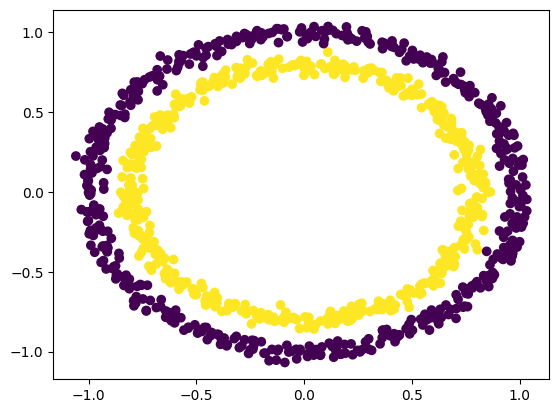

In [ ]:
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=Y)
plt.show()

In [ ]:
x_sample=X[0]
y_sample=Y[0]
print(f"the first sample of x sample : {x_sample} | y sample : {y_sample}")
print(f"the shape of the dataset x : {X.shape} |  y : {Y.shape}")

the first sample of x sample : [0.75424625 0.23148074] | y sample : 1
the shape of the dataset x : (1000, 2) |  y : (1000,)


In [ ]:
x=torch.from_numpy(X).type(torch.float32)
y=torch.from_numpy(Y).type(torch.float32)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(f"train set : \n{x_train} | \n \n test set : \n{y_train} \n\n")
print(f" shape of train set X shape : {x_train.shape} | y shape : {y_train.shape}")
type(x_train),type(x_test),type(y_train),type(y_test),

train set : 
tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]]) | 
 
 test set : 
tensor([1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
        1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
        0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1.,

(torch.Tensor, torch.Tensor, torch.Tensor, torch.Tensor)

In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

In [ ]:
class circle_modle(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=5)
    self.layer_2=nn.Linear(in_features=5,out_features=5)

  def forward(self,x):
    return self.layer_2(self.layer_1(x))


In [ ]:
modle_0=circle_modle().to(device)
modle_0

circle_modle(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=5, bias=True)
)

In [ ]:
model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3026,  0.0698],
                      [ 0.1122, -0.4868],
                      [-0.2525,  0.3456],
                      [ 0.6621,  0.3270],
                      [-0.2140, -0.5722]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.0930, -0.5753, -0.0754,  0.3096, -0.4369], device='cuda:0')),
             ('1.weight',
              tensor([[-0.3405,  0.4077, -0.3400,  0.1124, -0.1698]], device='cuda:0')),
             ('1.bias', tensor([-0.2345], device='cuda:0'))])

In [ ]:
with torch.inference_mode():
  preds=model_0(x_test.to(device))

print(f"predictions for x :\n {x_test[:5]} \n\n is {torch.round(preds[:5])}")
print("\n")
print(f"predictions for x : {x_test[:5]} \n \n is {y_test[:5]}")

predictions for x :
 tensor([[-0.3752,  0.6827],
        [ 0.0154,  0.9600],
        [-0.7028, -0.3147],
        [-0.2853,  0.9664],
        [ 0.4024, -0.7438]]) 

 is tensor([[-1.],
        [-1.],
        [-1.],
        [-1.],
        [-0.]], device='cuda:0')


predictions for x : tensor([[-0.3752,  0.6827],
        [ 0.0154,  0.9600],
        [-0.7028, -0.3147],
        [-0.2853,  0.9664],
        [ 0.4024, -0.7438]]) 
 
 is tensor([1., 0., 1., 0., 1.])


In [ ]:
device

'cuda'

In [ ]:
loss_fn=nn.BCEWithLogitsLoss()
optimize=torch.optim.SGD(model_0.parameters(),lr=0.01,)

In [ ]:
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc



In [ ]:
model_0.eval()
with torch.inference_mode():
  y_preds=model_0(x_test.to(device))
y_preds[:5]

tensor([[-0.6361],
        [-0.5583],
        [-0.5440],
        [-0.6635],
        [-0.0740]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
y_pred_prob=torch.sigmoid(y_preds.to(device))
y_pred_prob[:5]

tensor([[0.3461],
        [0.3639],
        [0.3672],
        [0.3400],
        [0.4815]], device='cuda:0')

In [ ]:
y_round=torch.round(y_pred_prob)
y_round[:5]

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

In [ ]:
#in single line
y_round=torch.round(torch.sigmoid(y_preds.to(device)))
y_round[:5]

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

In [ ]:
epochs=500

x_train,y_train=x_train.to(device),y_train.to(device)
x_test,y_test=x_test.to(device),y_test.to(device)

for epoch in range(epochs):
  model_0.train()
  y_logit=model_0(x_train).squeeze()
  y_pred_prob=torch.round(torch.sigmoid(y_logit))
  loss=loss_fn(y_logit,y_train)
  train_acc=accuracy_fn(y_true=y_train,y_pred=y_pred_prob)
  optimize.zero_grad()
  loss.backward()
  optimize.step()

  model_0.eval()
  with torch.inference_mode():
    test_logit=model_0(x_test).squeeze()
    test_prob=torch.round(torch.sigmoid(test_logit))
    test_loss=loss_fn(test_logit,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_prob)

  if(epoch%10==0):
    print(f"the epoch : {epoch} | the loss with x_train : {loss} | the accuracy with train {train_acc} |the loss with train set : {test_loss} | the loss with test set {test_acc}")


the epoch : 0 | the loss with x_train : 0.717995285987854 | the accuracy with train 43.125 |the loss with train set : 0.717232346534729 | the loss with test set 45.5
the epoch : 10 | the loss with x_train : 0.7161654233932495 | the accuracy with train 41.75 |the loss with train set : 0.7155182361602783 | the loss with test set 45.0
the epoch : 20 | the loss with x_train : 0.7145087122917175 | the accuracy with train 41.25 |the loss with train set : 0.7139750719070435 | the loss with test set 43.5
the epoch : 30 | the loss with x_train : 0.7130075097084045 | the accuracy with train 40.375 |the loss with train set : 0.7125849723815918 | the loss with test set 44.0
the epoch : 40 | the loss with x_train : 0.7116460800170898 | the accuracy with train 42.75 |the loss with train set : 0.7113320827484131 | the loss with test set 44.0
the epoch : 50 | the loss with x_train : 0.7104105949401855 | the accuracy with train 44.875 |the loss with train set : 0.7102020382881165 | the loss with test s

In [ ]:
import requests
from pathlib import Path

if Path("helper_function.py").is_file():
  print("helpre_function.py is already exists , skipping download")
else:
  print("Downloading helper_function.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py","wb") as f:
    f.write(request.content)
from helper_function import plot_predictions,plot_decision_boundary

helpre_function.py is already exists , skipping download


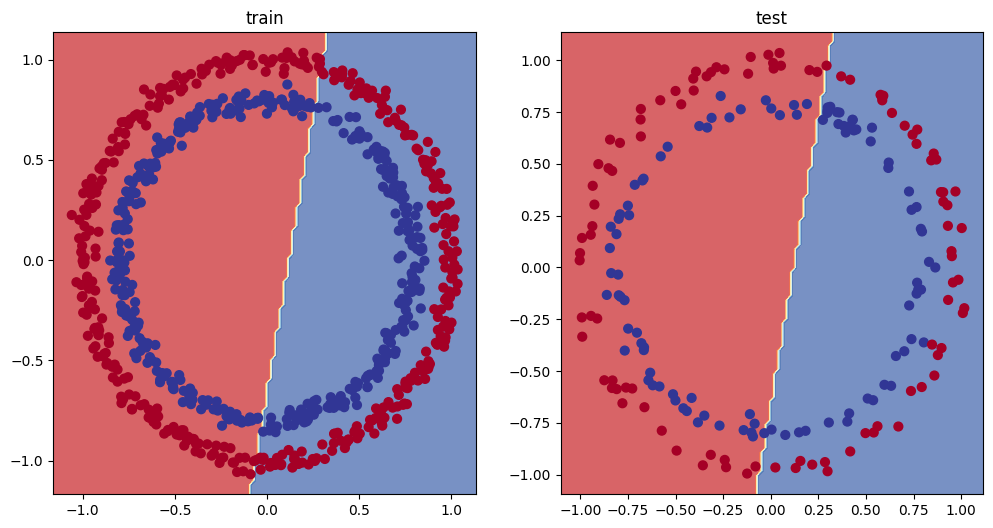

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_0,x_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0,x_test,y_test)


In [ ]:
class circle_model1(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_0=nn.Linear(in_features=2,out_features=10)
    self.linear_1=nn.Linear(in_features=10,out_features=10)
    self.linear_2=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU()

  def forward(self,x):
    return self.linear_2(self.relu((self.linear_1(self.relu((self.linear_0(x)))))))

In [ ]:
circle_1=circle_model1()
circle_1

circle_model1(
  (linear_0): Linear(in_features=2, out_features=10, bias=True)
  (linear_1): Linear(in_features=10, out_features=10, bias=True)
  (linear_2): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
loss_fn=nn.BCEWithLogitsLoss()


In [ ]:
optimizer=torch.optim.SGD(params=circle_1.parameters(),lr=0.01)


In [ ]:
device


'cuda'

In [ ]:
epochs=20000
circle_1.to(device)
x_train,y_train=x_train.to(device),y_train.to(device)
x_test,y_test=x_test.to(device),y_test.to(device)
for epoch in range(epochs):
  circle_1.train()
  y_logit=circle_1(x_train).squeeze()
  y_prob=torch.round(torch.sigmoid(y_logit))
  train_acc=accuracy_fn(y_true=y_train,y_pred=y_prob)
  train_loss=loss_fn(y_logit,y_train)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  circle_1.eval()
  with torch.inference_mode():
    test_logit=circle_1(x_test).squeeze()
    test_prob=torch.round(torch.sigmoid(test_logit))
    test_loss=loss_fn(test_logit,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_prob)

  if(epoch%10==0):
    print(f"the epoch : {epoch} | the loss with x_train : {train_loss} | the accuracy with train {train_acc} |the loss with train set : {test_loss} | the loss with test set {test_acc}")

the epoch : 0 | the loss with x_train : 0.1362238973379135 | the accuracy with train 99.875 |the loss with train set : 0.17696115374565125 | the loss with test set 99.5
the epoch : 10 | the loss with x_train : 0.13555052876472473 | the accuracy with train 99.875 |the loss with train set : 0.1762024313211441 | the loss with test set 99.5
the epoch : 20 | the loss with x_train : 0.13488207757472992 | the accuracy with train 99.875 |the loss with train set : 0.17545150220394135 | the loss with test set 99.5
the epoch : 30 | the loss with x_train : 0.13421791791915894 | the accuracy with train 99.875 |the loss with train set : 0.17470447719097137 | the loss with test set 99.5
the epoch : 40 | the loss with x_train : 0.13355810940265656 | the accuracy with train 99.875 |the loss with train set : 0.17396144568920135 | the loss with test set 99.5
the epoch : 50 | the loss with x_train : 0.1329018771648407 | the accuracy with train 99.875 |the loss with train set : 0.1732228398323059 | the los

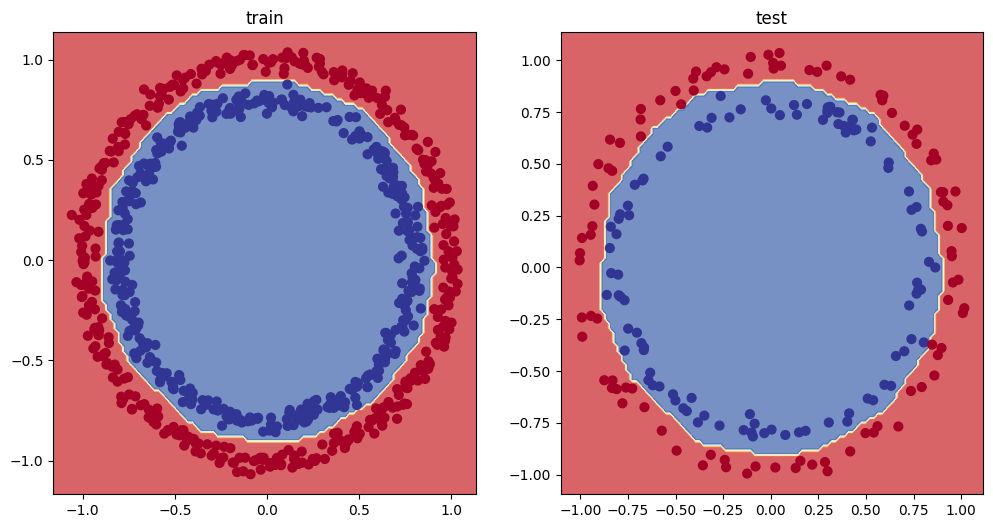

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(circle_1,x_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(circle_1,x_test,y_test)